<a href="https://colab.research.google.com/github/Anurag-Mishra22/Cats-vs-dogs-classification/blob/main/Cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 22.6MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.4MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
# generators -> used to process large ammount of data
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# Normalize ->  this we have done because we want pixel value from 0 to 1
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.1817 - accuracy: 0.5603 - val_loss: 2.3251 - val_accuracy: 0.5412
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6469 - accuracy: 0.6327 - val_loss: 0.9913 - val_accuracy: 0.5020
Epoch 3/10
625/625 [==============================] - 81s 129ms/step - loss: 0.6089 - accuracy: 0.6635 - val_loss: 0.7268 - val_accuracy: 0.6404
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5553 - accuracy: 0.7179 - val_loss: 0.5860 - val_accuracy: 0.7104
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4827 - accuracy: 0.7653 - val_loss: 0.7241 - val_accuracy: 0.6594
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4178 - accuracy: 0.8076 - val_loss: 1.0869 - val_accuracy: 0.6120
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3423 - accuracy: 0.8485 - val_loss: 0.7923 - val_ac

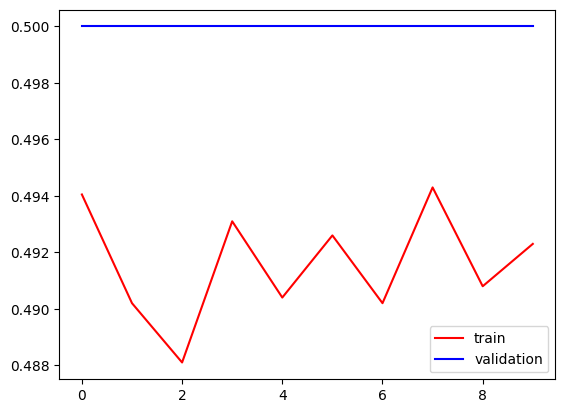

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

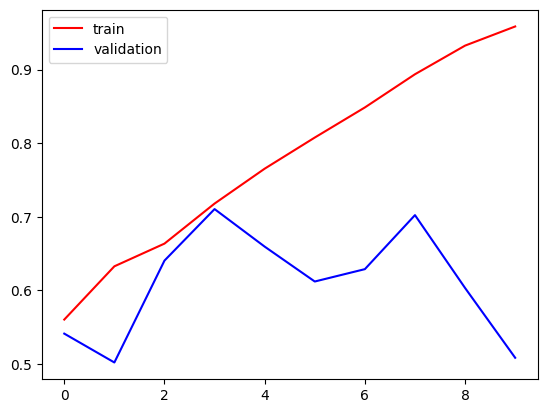

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

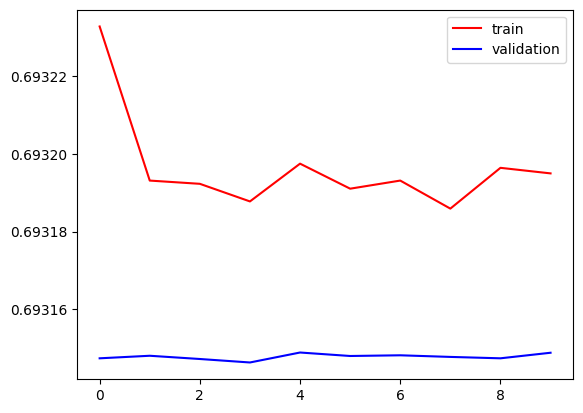

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

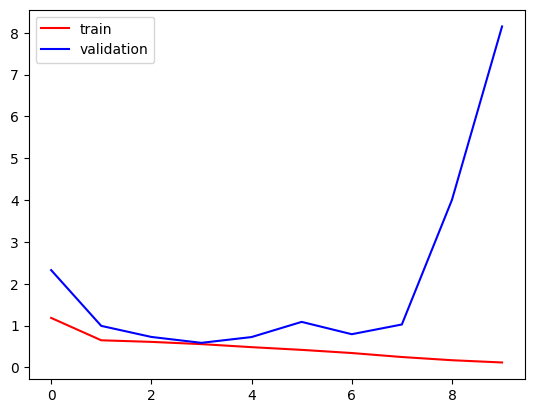

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [27]:
import cv2


In [30]:
test_img = cv2.imread('/content/dog.png')

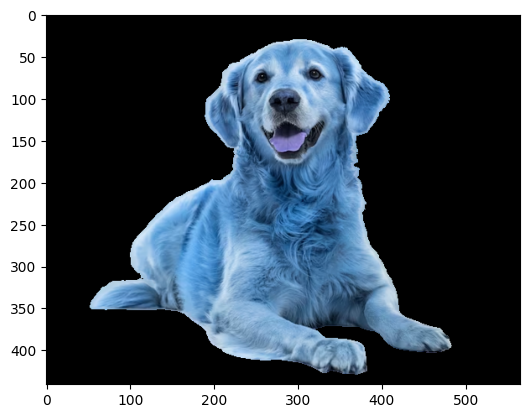

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(441, 565, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3)) # There is 1 image in the batch

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 399ms/step


array([[1.]], dtype=float32)

In [64]:
test_img2 = cv2.imread('/content/cat.jpg')

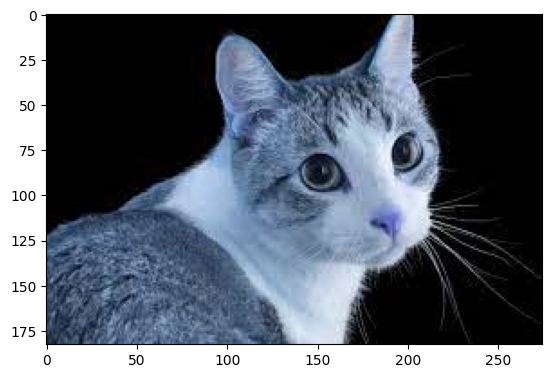

In [65]:
plt.imshow(test_img2)

In [66]:
test_img2.shape

(183, 275, 3)

In [67]:
test_img2 = cv2.resize(test_img2,(256,256))

In [68]:
test_input = test_img2.reshape((1,256,256,3)) # There is 1 image in the batch

In [69]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)